# Face Recognition using SVM

# Part A:

## The	Oivetti	database contains	face images	from	AT&T	research	lab.	It	includes 400	faces	(64x64	pixels)	from	40	people	(10	images	per	person). There is a csv	file	that	includes the	labels	of	the	images	(the	label	is	person’s	ID).	The	goal	is	to	build	a	Face	Recognition	algorithm	to	recognize	each	person	using	PCA	dimensionality	reduction	and	a	non-linear	SVM.	

# Part B:

## I built the	feature	matrix	and	label	vector:	Each	image	is	considered	as	a	data	sample	with pixels	as	features.	Thus,	to	build	the	feature	table	I	have	to	convert	each	64x64	image into	a row	of	the	feature	matrix	with	4096	columns.

In [90]:
%matplotlib inline

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



,Label
0,13
1,30
2,34
3,19
4,24


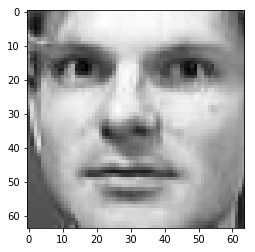

In [91]:

img_matrix = []

for i in range(0, 400):
    fileName = 'Face/'+str(i)+'.jpg'
    img_matrix.append(mpimg.imread(fileName).ravel())
    plt.imshow(mpimg.imread(fileName), cmap=plt.cm.gray)

    
id_df = pd.read_csv('Face/label.csv')
id_df.head()

# Part C:

## Normalize each column	of	the feature matrix.

In [92]:
img_df = pd.DataFrame(data=img_matrix)

X = img_df[img_df.columns]
y = id_df['Label']

X_norm = preprocessing.scale(X)

# Part D: 

## Using	sklearn	functions	to	split	the	Normalized	dataset	into	testing	and	training	sets	with the following	parameters:	test_size=0.25,	random_state=5.

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, id_df, test_size=0.25, random_state=5)

In [94]:
print(X_train.shape)
print(y_train.shape)


print(X_test.shape)
print(y_test.shape)

(300, 4096)
(300, 1)
(100, 4096)
(100, 1)


# Part E:

## The	dimensionality	of	the	data	samples	is	4096.	I use PCA	to	reduce	the	dimensionality	from 4096 to	 50	 (only	 50	 principal	 components!).	 I need	 to	 “fit”	 my	 PCA	 on	 the	training	set	only,	and	then	use	this	fitted	model	to	“transform”	both	training	and	testing	sets	(When	this is	finished,	the	number	of	columns	in	the	testing	and	training sets should	be	50).	

In [99]:
my_PCA = PCA(n_components=50)

my_PCA.fit(X_train)
my_PCA.fit(X_test)

train_pca = my_PCA.transform(X_train)
test_pca = my_PCA.transform(X_test)

# Part F:

## I will design	and	Train	a	non-linear	SVM	classifier	to	recognize	the	face	based	on	the	training	dataset	 that	 you	 built	 in	 part	 (e).	I will also calculate	and	report	the	Confusion	Matrix.		

In [100]:
my_SVC = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
my_SVC.fit(train_pca, y_train)

y_predict_svm = my_SVC.predict(test_pca)
score_svm = accuracy_score(y_test, y_predict_svm)
print(score_svm)

0.91


/home/me/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
cm_SVM = metrics.confusion_matrix(y_test, y_predict_svm)
print('Confusion Matrix')
print(cm_SVM)

train_pca_df = pd.DataFrame(train_pca)
test_pca_df = pd.DataFrame(test_pca)


Confusion Matrix
[[3 0 0 ..., 0 0 0]
 [0 3 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 5 0 0]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 1]]


# Part G:

## Now,	I will use	GridSearchCV	to	find	the	best	value	for	parameter	C.	Search	in	this	list:	[0.1,	1,	10,	100,	1e3,	5e3,	1e4,	5e4,	1e5].	

In [102]:
#Merging X_train, X_test together and y_train, y_test together

merged_X = test_pca_df.append(train_pca_df)
merged_y = pd.concat([y_test, y_train])['Label']

In [103]:
param_grid = dict(C=[0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5])
my_SVM = SVC(kernel='rbf', gamma=0.0005, random_state=1)

my_Grid = GridSearchCV(my_SVM, param_grid, cv = 10, scoring='accuracy')
my_Grid.fit(merged_X, merged_y)

print(my_Grid.best_score_)
print(my_Grid.best_params_)

0.9625
{'C': 1}
